In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
columns_names = ['user_id','item_id','rating','timestamp']

In [4]:
df = pd.read_csv('u.data',sep='\t',names=columns_names)

In [5]:
print('Tobi\tTobi')

Tobi	Tobi


In [6]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [7]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [8]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
df = pd.merge(df,movie_titles)

In [10]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [11]:
pd.concat([df,movie_titles],axis=1)

,user_id,item_id,rating,timestamp,title,item_id,title
0,0,50,5,881250949,Star Wars (1977),1.0,Toy Story (1995)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)",2.0,GoldenEye (1995)
2,0,133,1,881250949,Gone with the Wind (1939),3.0,Four Rooms (1995)
3,196,242,3,881250949,Kolya (1996),4.0,Get Shorty (1995)
4,186,302,3,891717742,L.A. Confidential (1997),5.0,Copycat (1995)
...,...,...,...,...,...,...,...
99998,880,476,3,880175444,"First Wives Club, The (1996)",NaN,NaN
99999,716,204,5,879795543,Back to the Future (1985),NaN,NaN
100000,276,1090,1,874795795,Sliver (1993),NaN,NaN
100001,13,225,2,882399156,101 Dalmatians (1996),NaN,NaN


In [12]:
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns

In [14]:
sns.set_style('white')

In [15]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [16]:
df.groupby('title').mean()['rating'].sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [17]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [18]:
df.groupby('title')['rating'].value_counts()['Star Wars (1977)']#["'Til There Was You (1997)"]#.sort_values(ascending=False).head()

rating
5    326
4    176
3     57
2     16
1      9
Name: count, dtype: int64

In [19]:
df.groupby('title').mean()['rating']['Star Wars (1977)']

4.359589041095891

In [20]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [21]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [22]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [23]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Text(0, 0.5, 'how many movies have that number of ratings')

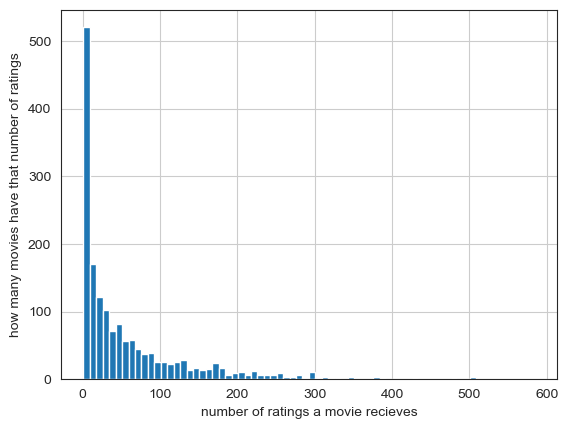

In [24]:
ratings['num of ratings'].hist(bins=70)
plt.xlabel('number of ratings a movie recieves')
plt.ylabel('how many movies have that number of ratings')

<Axes: >

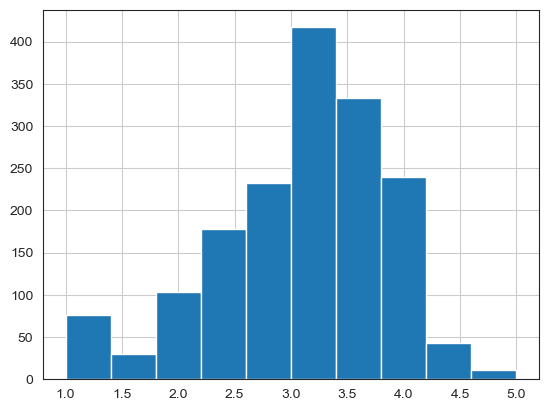

In [25]:
ratings['rating'].hist()

<Axes: >

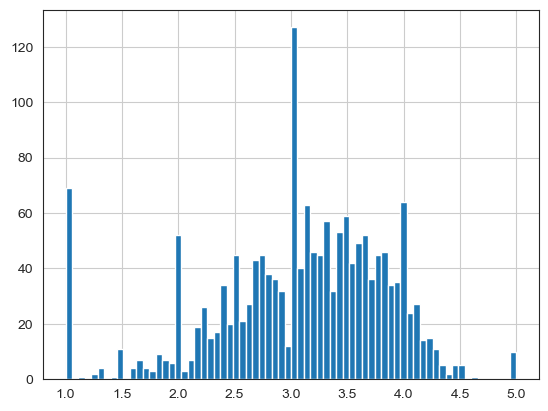

In [26]:
ratings['rating'].hist(bins=70)

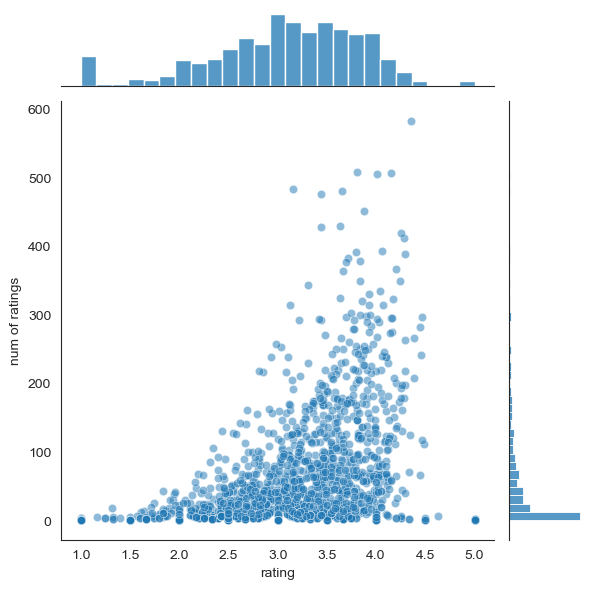

In [27]:
sns.jointplot(data=ratings,x='rating',y='num of ratings',alpha=0.5)

In [28]:
 df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [29]:
t = df[['user_id','rating','title']]

In [30]:
t

,user_id,rating,title
0,0,5,Star Wars (1977)
1,0,5,"Empire Strikes Back, The (1980)"
2,0,1,Gone with the Wind (1939)
3,196,3,Kolya (1996)
4,186,3,L.A. Confidential (1997)
...,...,...,...
99998,880,3,"First Wives Club, The (1996)"
99999,716,5,Back to the Future (1985)
100000,276,1,Sliver (1993)
100001,13,2,101 Dalmatians (1996)


In [31]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')

In [32]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
moviemat.dropna()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,


In [34]:
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [35]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [36]:
ratings.sort_values('rating',ascending=False).head(10)

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
"Great Day in Harlem, A (1994)",5.0,1
Aiqing wansui (1994),5.0,1
Santa with Muscles (1996),5.0,2
Prefontaine (1997),5.0,3


In [37]:
moviemat.head(10)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [39]:
starwars_user_ratings

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [40]:
starwars_user_ratings.dropna()

user_id
0      5.0
1      5.0
2      5.0
4      5.0
5      4.0
      ... 
937    5.0
938    5.0
940    4.0
942    5.0
943    4.0
Name: Star Wars (1977), Length: 584, dtype: float64

In [41]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

C:\Users\hypem\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\hypem\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\hypem\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\hypem\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\hypem\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [42]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

In [43]:
liarliar_user_ratings

user_id
0      NaN
1      NaN
2      1.0
3      2.0
4      5.0
      ... 
939    NaN
940    4.0
941    4.0
942    NaN
943    NaN
Name: Liar Liar (1997), Length: 944, dtype: float64

In [44]:
similar_to_liarliar

title
'Til There Was You (1997)                0.118913
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
                                           ...   
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [45]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [46]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [47]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [48]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [49]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [50]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])

In [51]:
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [52]:
ratings['num of ratings'].head()

title
'Til There Was You (1997)      9
1-900 (1994)                   5
101 Dalmatians (1996)        109
12 Angry Men (1957)          125
187 (1997)                    41
Name: num of ratings, dtype: int64

In [53]:
corr_starwars[corr_starwars['num of ratings'] > 100].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [54]:
similar_to_liarliar

title
'Til There Was You (1997)                0.118913
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
                                           ...   
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [55]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])

In [56]:
corr_liarliar.dropna(inplace=True)

In [57]:
corr_liarliar.sort_values('Correlation',ascending=False)

,Correlation
title,
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
Crossfire (1947),1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0
...,...
Aparajito (1956),-1.0
"Quiet Room, The (1996)",-1.0
Germinal (1993),-1.0


In [58]:
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])

In [59]:
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
...,...,...
Hoop Dreams (1994),-0.184503,117
Ed Wood (1994),-0.199481,133
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),-0.238092,194


In [60]:
n_users = df['user_id'].nunique()
n_items = df['item_id'].nunique()

In [61]:
# create two user matrices, one for training and one for testing
train_data_matrix = np.zeros((n_users,n_items))

In [62]:
train_data_matrix.shape

(944, 1682)

In [63]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df,test_size=0.25)

In [64]:
for line in train_data.itertuples():
    train_data_matrix[line[1]-1,line[2]-1] = line[3]

In [65]:
test_data_matrix = np.zeros((n_users,n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1,line[2]-1] = line[3]

In [66]:
from sklearn.metrics import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix,metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T,metric='cosine')


In [67]:
pd.DataFrame(user_similarity)

,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
0,0.000000,0.879151,0.971138,0.942315,0.678147,0.676195,0.647758,0.696292,0.959755,0.654048,...,0.895061,0.778459,0.843149,0.839178,0.870447,0.778695,0.860539,0.844623,0.680315,0.861739
1,0.879151,0.000000,0.922880,0.783530,0.932489,0.777696,0.923435,0.947537,0.921791,0.859157,...,0.718380,0.761739,0.704313,0.816029,0.847377,0.795469,0.900696,0.799784,0.918895,0.875608
2,0.971138,0.922880,0.000000,0.747798,1.000000,0.949740,0.937355,0.921711,0.925857,0.951844,...,0.946078,0.927210,0.923988,0.932308,0.967405,0.877222,0.896612,0.888826,0.981429,1.000000
3,0.942315,0.783530,0.747798,0.000000,0.955928,0.939036,0.919278,0.813286,0.868602,0.919285,...,0.950449,0.897203,0.818392,0.874462,0.960064,0.823995,0.860658,0.764755,0.943684,0.809587
4,0.678147,0.932489,1.000000,0.955928,0.000000,0.816662,0.752411,0.857683,0.970002,0.866888,...,0.952913,0.930560,0.925371,0.870158,0.922046,0.876558,0.913784,0.902138,0.753454,0.823943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.778695,0.795469,0.877222,0.823995,0.876558,0.760330,0.765134,0.805917,0.879741,0.783120,...,0.954650,0.823596,0.822600,0.870936,0.937178,0.000000,0.878629,0.818054,0.839663,1.000000
940,0.860539,0.900696,0.896612,0.860658,0.913784,0.919319,0.950151,0.875357,0.821845,0.903371,...,0.811711,0.823644,0.751774,0.802067,0.848244,0.878629,0.000000,0.964534,0.952049,1.000000
941,0.844623,0.799784,0.888826,0.764755,0.902138,0.768489,0.781823,0.840364,0.926424,0.886414,...,0.922312,0.909322,0.887357,0.933505,0.942976,0.818054,0.964534,0.000000,0.854512,0.893378
942,0.680315,0.918895,0.981429,0.943684,0.753454,0.752085,0.690074,0.751596,0.949472,0.801975,...,0.825295,0.892172,0.929895,0.851750,0.882516,0.839663,0.952049,0.854512,0.000000,0.868200


In [68]:
pd.DataFrame(item_similarity)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.000000,0.696744,0.734741,0.662424,0.803222,0.943240,0.535217,0.621087,0.640456,0.813094,...,0.959288,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.945717,1.0
1,0.696744,0.000000,0.844123,0.579941,0.729074,0.946968,0.734857,0.750436,0.787797,0.924340,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.907019,1.0
2,0.734741,0.844123,0.000000,0.715858,0.852052,0.972875,0.694323,0.858807,0.755788,0.875304,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0
3,0.662424,0.579941,0.715858,0.000000,0.718187,0.951536,0.659703,0.642314,0.650868,0.804096,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.936271,1.0
4,0.803222,0.729074,0.852052,0.718187,0.000000,0.982621,0.754499,0.809367,0.769749,0.963842,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.000000,1.0
1678,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.000000,1.0
1679,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.000000,1.0
1680,0.945717,0.907019,1.000000,0.936271,1.000000,1.000000,1.000000,0.903453,1.000000,1.000000,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1.0


In [69]:
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [70]:
pd.DataFrame(train_data_matrix).head()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5.0,3.0,4.0,3.0,3.0,0.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
pd.DataFrame(train_data_matrix.mean(axis=1)).head()

,0
0,0.439358
1,0.118906
2,0.073127
3,0.045184
4,0.218193


In [72]:
import numpy as np

# Create a 1D array
a = np.array([1, 2, 3, 4])
print(f"Original array shape: {a.shape}")  # (4,)

# Add a new axis at the beginning (make it a column vector)
col_vector = a[:, np.newaxis]
print(f"Column vector shape: {col_vector.shape}")  # (4, 1)

# Add a new axis at the end (make it a row vector)
row_vector = a[np.newaxis, :]
print(f"Row vector shape: {row_vector.shape}")  # (1, 4)

col_vector


Original array shape: (4,)
Column vector shape: (4, 1)
Row vector shape: (1, 4)


array([[1],
       [2],
       [3],
       [4]])

In [73]:
import numpy as np

# Example 1: Basic dot product calculation
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

dot_product = np.dot(a, b)  # Equivalent to a.dot(b)
print(f"Dot product: {dot_product}")  # 1*4 + 2*5 + 3*6 = 32

# Example 2: Cosine similarity between two vectors
def cosine_similarity(v1, v2):
    dot = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot / (norm_v1 * norm_v2)

# Calculate cosine similarity
cos_sim = cosine_similarity(a, b)
print(f"Cosine similarity: {cos_sim}")

# Example 3: Normalized vectors (unit vectors)
a_normalized = a / np.linalg.norm(a)
b_normalized = b / np.linalg.norm(b)

# For normalized vectors, dot product equals cosine similarity
dot_normalized = np.dot(a_normalized, b_normalized)
print(f"Dot product of normalized vectors: {dot_normalized}")


Dot product: 32
Cosine similarity: 0.9746318461970762
Dot product of normalized vectors: 0.9746318461970762


In [74]:
import numpy as np

# Create a 2D array (3 rows, 4 columns)
arr_2d = np.array([
    [1, 2, 3, 4],    # Row 0
    [5, 6, 7, 8],    # Row 1
    [9, 10, 11, 12]  # Row 2
])

# Sum along axis=1 (sum each row)
row_sums = arr_2d.sum(axis=1)
print("Original array:")
print(arr_2d)
print("\nSum along axis=1 (row sums):")
print(row_sums)  # Output: [10 26 42]


Original array:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

Sum along axis=1 (row sums):
[10 26 42]


item_similarity

In [76]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [77]:
item_prediction = predict(train_data_matrix, item_similarity,type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

In [78]:
pd.DataFrame(user_prediction)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,1.572071,0.545563,0.493941,0.800937,0.505058,0.352083,1.328034,0.875357,1.176010,0.542324,...,0.291954,0.292696,0.292029,0.290963,0.288832,0.288832,0.292584,0.291334,0.291305,0.288832
1,1.347035,0.277504,0.185254,0.576848,0.210019,0.013967,1.096410,0.637784,0.900465,0.223403,...,-0.047133,-0.045531,-0.047030,-0.048067,-0.050142,-0.050142,-0.047498,-0.048379,-0.046905,-0.050142
2,1.341619,0.225738,0.145384,0.530289,0.161996,-0.028707,1.070852,0.595832,0.888282,0.191528,...,-0.093210,-0.092077,-0.093886,-0.094819,-0.096687,-0.096687,-0.094498,-0.095228,-0.093442,-0.096687
3,1.291109,0.194855,0.115169,0.495018,0.132996,-0.056214,1.036112,0.564502,0.853740,0.165768,...,-0.120642,-0.119612,-0.120608,-0.121735,-0.123990,-0.123990,-0.121255,-0.122167,-0.120635,-0.123990
4,1.365795,0.329540,0.280601,0.608431,0.289511,0.128640,1.137396,0.679394,0.999218,0.332382,...,0.065297,0.066202,0.065507,0.064412,0.062221,0.062221,0.065847,0.064638,0.064789,0.062221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,1.384152,0.297232,0.231050,0.570802,0.243653,0.066579,1.107946,0.620645,0.934997,0.276590,...,0.005006,0.005763,0.004896,0.003849,0.001755,0.001755,0.004799,0.003784,0.004545,0.001755
940,1.198738,0.185183,0.104318,0.485776,0.127984,-0.058365,0.956535,0.545997,0.824961,0.157033,...,-0.122435,-0.121210,-0.122495,-0.123590,-0.125781,-0.125781,-0.122473,-0.123576,-0.122550,-0.125781
941,1.358339,0.281391,0.220828,0.567674,0.229780,0.051786,1.124393,0.623985,0.935774,0.262685,...,-0.011812,-0.011493,-0.011843,-0.012911,-0.015047,-0.015047,-0.011984,-0.013005,-0.012261,-0.015047
942,1.420195,0.370986,0.330001,0.637184,0.337855,0.188977,1.179967,0.724813,1.022686,0.396447,...,0.125599,0.126860,0.126011,0.124953,0.122835,0.122835,0.126629,0.125364,0.125103,0.122835


In [79]:
pd.DataFrame(item_prediction).head()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.357458,0.378504,0.389185,0.359191,0.392225,0.430291,0.363243,0.370607,0.369801,0.398215,...,0.437032,0.435477,0.439211,0.439211,0.439619,0.439619,0.442074,0.442074,0.432788,0.439619
1,0.102732,0.117709,0.111750,0.112703,0.115078,0.114235,0.104131,0.110234,0.102321,0.108597,...,0.117302,0.118865,0.117295,0.117295,0.118977,0.118977,0.116501,0.116501,0.118725,0.118977
2,0.071069,0.074454,0.072196,0.073825,0.073928,0.073168,0.070059,0.072492,0.070569,0.072284,...,0.073433,0.073820,0.070105,0.070105,0.073171,0.073171,0.069333,0.069333,0.072897,0.073171
3,0.039563,0.043296,0.042575,0.042126,0.043760,0.044620,0.040624,0.042253,0.040667,0.044163,...,0.045120,0.045025,0.045213,0.045213,0.045211,0.045211,0.043353,0.043353,0.045341,0.045211
4,0.178497,0.182753,0.198937,0.181551,0.196727,0.219259,0.185896,0.189372,0.196095,0.206811,...,0.217284,0.216724,0.219178,0.219178,0.218322,0.218322,0.220061,0.220061,0.214409,0.218322


In [80]:
mean_user_rating = train_data_matrix.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
ratings_diff = (train_data_matrix - mean_user_rating[:, np.newaxis]) 
pred = mean_user_rating[:, np.newaxis] + user_similarity.dot(ratings_diff) / np.array([np.abs(user_similarity).sum(axis=1)]).T

In [191]:
pd.DataFrame(user_similarity)

,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
0,0.000000,0.879151,0.971138,0.942315,0.678147,0.676195,0.647758,0.696292,0.959755,0.654048,...,0.895061,0.778459,0.843149,0.839178,0.870447,0.778695,0.860539,0.844623,0.680315,0.861739
1,0.879151,0.000000,0.922880,0.783530,0.932489,0.777696,0.923435,0.947537,0.921791,0.859157,...,0.718380,0.761739,0.704313,0.816029,0.847377,0.795469,0.900696,0.799784,0.918895,0.875608
2,0.971138,0.922880,0.000000,0.747798,1.000000,0.949740,0.937355,0.921711,0.925857,0.951844,...,0.946078,0.927210,0.923988,0.932308,0.967405,0.877222,0.896612,0.888826,0.981429,1.000000
3,0.942315,0.783530,0.747798,0.000000,0.955928,0.939036,0.919278,0.813286,0.868602,0.919285,...,0.950449,0.897203,0.818392,0.874462,0.960064,0.823995,0.860658,0.764755,0.943684,0.809587
4,0.678147,0.932489,1.000000,0.955928,0.000000,0.816662,0.752411,0.857683,0.970002,0.866888,...,0.952913,0.930560,0.925371,0.870158,0.922046,0.876558,0.913784,0.902138,0.753454,0.823943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.778695,0.795469,0.877222,0.823995,0.876558,0.760330,0.765134,0.805917,0.879741,0.783120,...,0.954650,0.823596,0.822600,0.870936,0.937178,0.000000,0.878629,0.818054,0.839663,1.000000
940,0.860539,0.900696,0.896612,0.860658,0.913784,0.919319,0.950151,0.875357,0.821845,0.903371,...,0.811711,0.823644,0.751774,0.802067,0.848244,0.878629,0.000000,0.964534,0.952049,1.000000
941,0.844623,0.799784,0.888826,0.764755,0.902138,0.768489,0.781823,0.840364,0.926424,0.886414,...,0.922312,0.909322,0.887357,0.933505,0.942976,0.818054,0.964534,0.000000,0.854512,0.893378
942,0.680315,0.918895,0.981429,0.943684,0.753454,0.752085,0.690074,0.751596,0.949472,0.801975,...,0.825295,0.892172,0.929895,0.851750,0.882516,0.839663,0.952049,0.854512,0.000000,0.868200


In [193]:
pd.DataFrame(ratings_diff)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,4.560642,2.560642,3.560642,2.560642,2.560642,-0.439358,3.560642,0.560642,4.560642,2.560642,...,-0.439358,-0.439358,-0.439358,-0.439358,-0.439358,-0.439358,-0.439358,-0.439358,-0.439358,-0.439358
1,3.881094,-0.118906,-0.118906,-0.118906,-0.118906,-0.118906,-0.118906,-0.118906,-0.118906,1.881094,...,-0.118906,-0.118906,-0.118906,-0.118906,-0.118906,-0.118906,-0.118906,-0.118906,-0.118906,-0.118906
2,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,...,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127
3,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,...,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184
4,3.781807,2.781807,-0.218193,-0.218193,-0.218193,-0.218193,-0.218193,-0.218193,-0.218193,-0.218193,...,-0.218193,-0.218193,-0.218193,-0.218193,-0.218193,-0.218193,-0.218193,-0.218193,-0.218193,-0.218193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,-0.162307,-0.162307,-0.162307,-0.162307,-0.162307,-0.162307,3.837693,4.837693,2.837693,-0.162307,...,-0.162307,-0.162307,-0.162307,-0.162307,-0.162307,-0.162307,-0.162307,-0.162307,-0.162307,-0.162307
940,4.958977,-0.041023,-0.041023,-0.041023,-0.041023,-0.041023,3.958977,-0.041023,-0.041023,-0.041023,...,-0.041023,-0.041023,-0.041023,-0.041023,-0.041023,-0.041023,-0.041023,-0.041023,-0.041023,-0.041023
941,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,...,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254
942,-0.274673,4.725327,-0.274673,-0.274673,-0.274673,-0.274673,-0.274673,-0.274673,2.725327,-0.274673,...,-0.274673,-0.274673,-0.274673,-0.274673,-0.274673,-0.274673,-0.274673,-0.274673,-0.274673,-0.274673


In [195]:
pd.DataFrame(user_similarity.dot(ratings_diff))

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,860.613909,80.692452,41.471068,274.720855,49.917678,-66.309535,675.198882,331.263509,559.694590,78.231947,...,-111.994846,-111.430786,-111.937689,-112.747262,-114.366407,-114.366407,-111.515936,-112.466093,-112.487842,-114.366407
1,983.960525,127.066755,53.156895,366.896699,72.998808,-84.075415,783.163223,415.718442,626.174719,83.721797,...,-133.028473,-131.744429,-132.945527,-133.776619,-135.438803,-135.438803,-133.320346,-134.026498,-132.845253,-135.438803
2,1081.771025,130.146607,61.620360,389.868253,75.787389,-86.844373,850.860381,445.763215,695.164886,100.972147,...,-141.852889,-140.886159,-142.428669,-143.225104,-144.817974,-144.817974,-142.951058,-143.573363,-142.050468,-144.817974
3,1047.999877,125.894084,58.866881,378.373778,73.861938,-85.290101,833.511147,436.819825,680.110023,101.427939,...,-139.483492,-138.617003,-139.454675,-140.402964,-142.299542,-142.299542,-139.999242,-140.766009,-139.477752,-142.299542
4,949.712082,92.147216,51.646641,322.946551,59.020105,-74.110135,760.697678,381.672411,646.347128,94.499044,...,-126.530662,-125.781716,-126.356511,-127.262939,-129.075794,-129.075794,-126.075794,-127.075794,-126.951059,-129.075794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,953.040225,105.241723,53.619741,318.626279,63.450241,-74.667950,737.599204,357.504141,602.699166,89.141361,...,-122.695087,-122.104664,-122.780736,-123.597208,-125.230151,-125.230151,-122.856241,-123.647544,-123.054609,-125.230151
940,982.637654,122.359765,53.723572,377.495056,73.810127,-84.357257,777.062014,428.608665,665.385775,98.466299,...,-138.738500,-137.698955,-138.789576,-139.719128,-141.578232,-141.578232,-138.770823,-139.706626,-138.835922,-141.578232
941,987.791394,110.130247,60.774011,343.436748,68.069170,-76.987494,797.136505,389.327580,643.421169,94.885740,...,-128.816877,-128.556771,-128.841701,-129.712059,-131.452774,-131.452774,-128.956513,-129.788600,-129.182810,-131.452774
942,905.891317,76.165443,43.754164,286.677609,49.964883,-67.769409,715.915857,355.975631,591.536851,96.300141,...,-117.889365,-116.891864,-117.563159,-118.400462,-120.075066,-120.075066,-117.075066,-118.075066,-118.281556,-120.075066


In [169]:
pd.DataFrame(mean_user_rating[:, np.newaxis])

,0
0,0.439358
1,0.118906
2,0.073127
3,0.045184
4,0.218193
...,...
939,0.162307
940,0.041023
941,0.146254
942,0.274673


In [81]:
pd.DataFrame(mean_user_rating[:, np.newaxis] + user_similarity.dot(ratings_diff))

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,861.053267,81.131810,41.910426,275.160213,50.357036,-65.870177,675.638240,331.702867,560.133948,78.671305,...,-111.555488,-110.991428,-111.498331,-112.307904,-113.927049,-113.927049,-111.076578,-112.026735,-112.048484,-113.927049
1,984.079431,127.185661,53.275801,367.015605,73.117714,-83.956509,783.282130,415.837349,626.293625,83.840703,...,-132.909567,-131.625523,-132.826621,-133.657713,-135.319896,-135.319896,-133.201440,-133.907592,-132.726347,-135.319896
2,1081.844152,130.219735,61.693487,389.941380,75.860516,-86.771246,850.933508,445.836342,695.238014,101.045274,...,-141.779762,-140.813032,-142.355542,-143.151977,-144.744847,-144.744847,-142.877930,-143.500236,-141.977341,-144.744847
3,1048.045062,125.939268,58.912066,378.418963,73.907122,-85.244916,833.556331,436.865009,680.155207,101.473124,...,-139.438307,-138.571818,-139.409491,-140.357780,-142.254357,-142.254357,-139.954058,-140.720824,-139.432568,-142.254357
4,949.930275,92.365409,51.864833,323.164743,59.238298,-73.891942,760.915871,381.890603,646.565321,94.717237,...,-126.312470,-125.563523,-126.138318,-127.044746,-128.857602,-128.857602,-125.857602,-126.857602,-126.732867,-128.857602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,953.202532,105.404030,53.782047,318.788586,63.612548,-74.505643,737.761510,357.666448,602.861473,89.303668,...,-122.532780,-121.942357,-122.618429,-123.434901,-125.067844,-125.067844,-122.693934,-123.485238,-122.892302,-125.067844
940,982.678677,122.400788,53.764594,377.536079,73.851150,-84.316234,777.103036,428.649687,665.426798,98.507321,...,-138.697478,-137.657932,-138.748553,-139.678105,-141.537210,-141.537210,-138.729800,-139.665603,-138.794900,-141.537210
941,987.937648,110.276502,60.920266,343.583003,68.215425,-76.841239,797.282759,389.473834,643.567423,95.031994,...,-128.670623,-128.410516,-128.695447,-129.565805,-131.306520,-131.306520,-128.810259,-129.642346,-129.036556,-131.306520
942,906.165990,76.440116,44.028837,286.952282,50.239556,-67.494736,716.190530,356.250304,591.811524,96.574814,...,-117.614692,-116.617191,-117.288486,-118.125789,-119.800393,-119.800393,-116.800393,-117.800393,-118.006883,-119.800393


In [82]:
pd.DataFrame(np.array([np.abs(user_similarity).sum(axis=1)]).T)

,0
0,759.781021
1,801.186591
2,852.800803
3,841.142148
4,827.561933
...,...
939,780.000876
940,848.772966
941,814.952621
942,790.810690


In [83]:
pd.DataFrame(pred)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,1.572071,0.545563,0.493941,0.800937,0.505058,0.352083,1.328034,0.875357,1.176010,0.542324,...,0.291954,0.292696,0.292029,0.290963,0.288832,0.288832,0.292584,0.291334,0.291305,0.288832
1,1.347035,0.277504,0.185254,0.576848,0.210019,0.013967,1.096410,0.637784,0.900465,0.223403,...,-0.047133,-0.045531,-0.047030,-0.048067,-0.050142,-0.050142,-0.047498,-0.048379,-0.046905,-0.050142
2,1.341619,0.225738,0.145384,0.530289,0.161996,-0.028707,1.070852,0.595832,0.888282,0.191528,...,-0.093210,-0.092077,-0.093886,-0.094819,-0.096687,-0.096687,-0.094498,-0.095228,-0.093442,-0.096687
3,1.291109,0.194855,0.115169,0.495018,0.132996,-0.056214,1.036112,0.564502,0.853740,0.165768,...,-0.120642,-0.119612,-0.120608,-0.121735,-0.123990,-0.123990,-0.121255,-0.122167,-0.120635,-0.123990
4,1.365795,0.329540,0.280601,0.608431,0.289511,0.128640,1.137396,0.679394,0.999218,0.332382,...,0.065297,0.066202,0.065507,0.064412,0.062221,0.062221,0.065847,0.064638,0.064789,0.062221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,1.384152,0.297232,0.231050,0.570802,0.243653,0.066579,1.107946,0.620645,0.934997,0.276590,...,0.005006,0.005763,0.004896,0.003849,0.001755,0.001755,0.004799,0.003784,0.004545,0.001755
940,1.198738,0.185183,0.104318,0.485776,0.127984,-0.058365,0.956535,0.545997,0.824961,0.157033,...,-0.122435,-0.121210,-0.122495,-0.123590,-0.125781,-0.125781,-0.122473,-0.123576,-0.122550,-0.125781
941,1.358339,0.281391,0.220828,0.567674,0.229780,0.051786,1.124393,0.623985,0.935774,0.262685,...,-0.011812,-0.011493,-0.011843,-0.012911,-0.015047,-0.015047,-0.011984,-0.013005,-0.012261,-0.015047
942,1.420195,0.370986,0.330001,0.637184,0.337855,0.188977,1.179967,0.724813,1.022686,0.396447,...,0.125599,0.126860,0.126011,0.124953,0.122835,0.122835,0.126629,0.125364,0.125103,0.122835


In [84]:
pd.DataFrame(ratings_diff)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,4.560642,2.560642,3.560642,2.560642,2.560642,-0.439358,3.560642,0.560642,4.560642,2.560642,...,-0.439358,-0.439358,-0.439358,-0.439358,-0.439358,-0.439358,-0.439358,-0.439358,-0.439358,-0.439358
1,3.881094,-0.118906,-0.118906,-0.118906,-0.118906,-0.118906,-0.118906,-0.118906,-0.118906,1.881094,...,-0.118906,-0.118906,-0.118906,-0.118906,-0.118906,-0.118906,-0.118906,-0.118906,-0.118906,-0.118906
2,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,...,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127,-0.073127
3,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,...,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184,-0.045184
4,3.781807,2.781807,-0.218193,-0.218193,-0.218193,-0.218193,-0.218193,-0.218193,-0.218193,-0.218193,...,-0.218193,-0.218193,-0.218193,-0.218193,-0.218193,-0.218193,-0.218193,-0.218193,-0.218193,-0.218193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,-0.162307,-0.162307,-0.162307,-0.162307,-0.162307,-0.162307,3.837693,4.837693,2.837693,-0.162307,...,-0.162307,-0.162307,-0.162307,-0.162307,-0.162307,-0.162307,-0.162307,-0.162307,-0.162307,-0.162307
940,4.958977,-0.041023,-0.041023,-0.041023,-0.041023,-0.041023,3.958977,-0.041023,-0.041023,-0.041023,...,-0.041023,-0.041023,-0.041023,-0.041023,-0.041023,-0.041023,-0.041023,-0.041023,-0.041023,-0.041023
941,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,...,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254,-0.146254
942,-0.274673,4.725327,-0.274673,-0.274673,-0.274673,-0.274673,-0.274673,-0.274673,2.725327,-0.274673,...,-0.274673,-0.274673,-0.274673,-0.274673,-0.274673,-0.274673,-0.274673,-0.274673,-0.274673,-0.274673


In [201]:
prediction = user_prediction[test_data_matrix.nonzero()].flatten()

In [213]:
pd.DataFrame(test_data_matrix.nonzero()).head()

,0,1,2,3,4,5,6,7,8,9,...,24991,24992,24993,24994,24995,24996,24997,24998,24999,25000
0,0,0,0,0,0,0,0,0,0,0,...,942,942,942,942,942,942,942,942,942,942
1,5,11,12,16,19,22,28,31,33,34,...,569,584,671,719,793,795,824,830,839,1010


In [241]:
pd.DataFrame(user_prediction[test_data_matrix.nonzero()].flatten()).shape

(25001, 1)

In [249]:
pd.DataFrame(user_prediction[test_data_matrix.nonzero()]).shape

(25001, 1)

In [233]:
pred_before = user_prediction[test_data_matrix.nonzero()]
print("Shape before flatten:", pred_before.shape)

pred_after = pred_before.flatten()
print("Shape after flatten:", pred_after.shape)


Shape before flatten: (25001,)
Shape after flatten: (25001,)


In [251]:
from sklearn.metrics import mean_squared_error

In [255]:
print(mean_squared_error(user_prediction,test_data_matrix))

0.2541886681184922


In [275]:
from math import sqrt
def rmse(prediction,ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = test_data_matrix[test_data_matrix.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction,ground_truth))

In [277]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 3.1216269490437463
Item-based CF RMSE: 3.4461043123528925


In [281]:
len(df)

100003

In [289]:
round(1.0 - len(df))

-100002

In [297]:
sparsity = round(1.0-len(df)/float(n_users * n_items),3)
print('The sparsity level of MovieLens100k is ' + str(sparsity*100) + '%')

The sparsity level of MovieLens100k is 93.7%


In [301]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k
u, s, vt = svds(train_data_matrix, k=20)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix),vt)
print('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

User-based CF MSE: 2.719588628266616


In [311]:
pd.DataFrame(u)
# u = m x k where m is users and k is latent features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.004998,-0.032402,0.126820,-0.034637,0.024602,-0.039582,0.001172,-0.002310,0.000058,-0.012722,-0.069308,0.077535,0.028869,-0.093745,-0.005843,0.008014,-0.068516,0.017881,-0.000459,-0.068686
1,-0.015400,0.021032,0.043790,0.008465,0.033316,0.028530,-0.014726,0.031903,-0.032218,0.044055,0.024740,0.023698,0.003843,-0.012155,0.011811,0.006492,0.023476,-0.057192,-0.053146,-0.015578
2,0.006726,0.024885,-0.011828,-0.020413,-0.003979,-0.028584,-0.006959,0.012786,0.001858,-0.020859,-0.003007,-0.018082,-0.006416,-0.002702,-0.001823,-0.048451,0.019576,-0.023553,-0.026165,-0.006153
3,-0.002999,0.014459,-0.015493,0.006936,0.002301,-0.020967,-0.002400,0.011649,0.032434,0.008187,-0.012556,-0.016174,-0.008156,-0.010386,-0.013864,-0.023877,0.020680,-0.013578,-0.021841,-0.007075
4,-0.033249,0.011014,0.034715,-0.011559,0.000839,0.050931,0.020533,-0.022946,0.024837,0.024334,-0.040511,-0.020359,0.091021,-0.069192,-0.014540,-0.009909,-0.020338,0.037465,0.005839,-0.029853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.030248,0.020532,-0.000331,0.098273,0.020704,0.015112,0.033869,-0.043047,0.014474,0.005926,-0.003714,0.002192,-0.033192,-0.048897,0.004450,-0.036307,0.015034,-0.032159,-0.015401,-0.028886
940,-0.013570,0.011878,0.033198,0.014394,-0.009777,-0.024994,0.001587,0.008086,0.003653,-0.013630,-0.007666,-0.009659,0.022176,-0.014598,-0.026454,0.014709,-0.005787,-0.006239,-0.022108,-0.007168
941,-0.018159,0.003383,-0.011825,-0.024002,-0.020178,0.025513,-0.030108,0.005451,-0.013271,-0.019618,0.014053,-0.004759,-0.041222,0.006236,-0.027509,-0.022216,0.074173,-0.017184,-0.000917,-0.024168
942,-0.001308,-0.007955,-0.079285,-0.006387,-0.063433,-0.008283,-0.001778,0.066850,0.006345,0.093169,0.042924,0.006563,-0.068944,0.027552,0.003884,-0.004335,-0.041038,0.062000,-0.010772,-0.046798


In [313]:
pd.DataFrame(s)
# s is k, i think it represent how import the latent feature is

,0
0,68.755881
1,69.451240
2,70.367968
3,71.530510
4,72.951928
5,73.947366
6,75.240795
7,76.779292
8,78.638359
9,79.733643


In [317]:
pd.DataFrame(vt)
# vt is k x n where n is item

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,-0.137703,-0.030630,-0.010479,0.062545,0.017845,-0.002536,-0.041947,0.056570,0.004989,-0.015628,...,0.001627,0.003883,0.000561,0.000374,0.0,0.0,0.000220,0.000147,-0.002236,0.0
1,-0.101725,-0.004064,-0.020416,0.038119,-0.027509,-0.001978,-0.103758,0.013146,0.058062,-0.001928,...,0.001960,-0.004284,-0.001720,-0.001147,0.0,0.0,-0.000365,-0.000244,0.000212,0.0
2,0.055633,-0.024952,-0.015799,-0.023072,0.029186,-0.020222,0.047950,0.078987,0.036737,-0.034413,...,-0.001163,-0.003529,0.002346,0.001564,0.0,0.0,-0.000366,-0.000244,0.002898,0.0
3,-0.016459,0.014657,0.011146,0.042704,0.004617,-0.015921,0.015080,0.098008,0.020987,-0.023374,...,0.000084,-0.000139,-0.001958,-0.001305,0.0,0.0,-0.000079,-0.000053,-0.001703,0.0
4,0.044550,-0.035904,-0.029554,0.009409,0.027466,0.004583,-0.131761,0.043526,-0.066197,-0.016562,...,0.001258,0.003127,0.001484,0.000989,0.0,0.0,0.000015,0.000010,-0.000223,0.0
5,0.024532,-0.017637,0.028213,0.024804,-0.042498,-0.011692,0.003046,-0.095420,-0.063199,-0.022058,...,0.003656,0.001413,0.001167,0.000778,0.0,0.0,0.000772,0.000514,0.000777,0.0
6,0.038880,0.019770,0.012157,0.058910,-0.036186,-0.012179,0.030320,0.073687,0.098074,-0.001844,...,-0.003165,-0.002611,-0.000251,-0.000167,0.0,0.0,0.000296,0.000198,-0.000735,0.0
7,-0.010759,0.023447,0.035793,-0.038078,-0.075342,0.019391,-0.021432,-0.050423,0.029597,0.000400,...,0.001495,-0.000847,-0.001817,-0.001212,0.0,0.0,-0.000294,-0.000196,0.000561,0.0
8,-0.057644,-0.018085,0.005679,0.014003,0.005567,-0.004709,-0.064693,-0.044603,-0.068777,-0.023711,...,0.000337,-0.000930,-0.002330,-0.001553,0.0,0.0,-0.000527,-0.000351,0.000386,0.0
9,-0.048370,0.022750,-0.010420,0.042770,0.039270,0.009133,0.073094,-0.024339,0.026746,-0.028947,...,0.000502,-0.002151,-0.004132,-0.002755,0.0,0.0,-0.000054,-0.000036,-0.002025,0.0


In [329]:
import numpy as np

# Create a simple array
arr = np.array([3, 1, 4, 2])

# Get the indices that would sort this array
sorted_indices = np.argsort(arr)

print("Original array:", arr)
print("Sorted indices:", sorted_indices)
print("Values in sorted order:", arr[sorted_indices])


Original array: [3 1 4 2]
Sorted indices: [1 3 0 2]
Values in sorted order: [1 2 3 4]


In [333]:
pd.DataFrame(vt)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,-0.137703,-0.030630,-0.010479,0.062545,0.017845,-0.002536,-0.041947,0.056570,0.004989,-0.015628,...,0.001627,0.003883,0.000561,0.000374,0.0,0.0,0.000220,0.000147,-0.002236,0.0
1,-0.101725,-0.004064,-0.020416,0.038119,-0.027509,-0.001978,-0.103758,0.013146,0.058062,-0.001928,...,0.001960,-0.004284,-0.001720,-0.001147,0.0,0.0,-0.000365,-0.000244,0.000212,0.0
2,0.055633,-0.024952,-0.015799,-0.023072,0.029186,-0.020222,0.047950,0.078987,0.036737,-0.034413,...,-0.001163,-0.003529,0.002346,0.001564,0.0,0.0,-0.000366,-0.000244,0.002898,0.0
3,-0.016459,0.014657,0.011146,0.042704,0.004617,-0.015921,0.015080,0.098008,0.020987,-0.023374,...,0.000084,-0.000139,-0.001958,-0.001305,0.0,0.0,-0.000079,-0.000053,-0.001703,0.0
4,0.044550,-0.035904,-0.029554,0.009409,0.027466,0.004583,-0.131761,0.043526,-0.066197,-0.016562,...,0.001258,0.003127,0.001484,0.000989,0.0,0.0,0.000015,0.000010,-0.000223,0.0
5,0.024532,-0.017637,0.028213,0.024804,-0.042498,-0.011692,0.003046,-0.095420,-0.063199,-0.022058,...,0.003656,0.001413,0.001167,0.000778,0.0,0.0,0.000772,0.000514,0.000777,0.0
6,0.038880,0.019770,0.012157,0.058910,-0.036186,-0.012179,0.030320,0.073687,0.098074,-0.001844,...,-0.003165,-0.002611,-0.000251,-0.000167,0.0,0.0,0.000296,0.000198,-0.000735,0.0
7,-0.010759,0.023447,0.035793,-0.038078,-0.075342,0.019391,-0.021432,-0.050423,0.029597,0.000400,...,0.001495,-0.000847,-0.001817,-0.001212,0.0,0.0,-0.000294,-0.000196,0.000561,0.0
8,-0.057644,-0.018085,0.005679,0.014003,0.005567,-0.004709,-0.064693,-0.044603,-0.068777,-0.023711,...,0.000337,-0.000930,-0.002330,-0.001553,0.0,0.0,-0.000527,-0.000351,0.000386,0.0
9,-0.048370,0.022750,-0.010420,0.042770,0.039270,0.009133,0.073094,-0.024339,0.026746,-0.028947,...,0.000502,-0.002151,-0.004132,-0.002755,0.0,0.0,-0.000054,-0.000036,-0.002025,0.0


In [321]:
def interpret_latent_features(vt, movie_titles, n_features=20, top_n=10):
    """
    Interpret what each latent feature might represent by looking at the top movies
    associated with each feature.
    
    Parameters:
    -----------
    vt : numpy array
        The item-feature matrix from SVD
    movie_titles : pandas DataFrame
        DataFrame containing movie titles with item_id
    n_features : int
        Number of features to interpret
    top_n : int
        Number of top movies to show for each feature
    """
    # Make sure we don't try to interpret more features than we have
    n_features = min(n_features, vt.shape[0])
    
    # For each latent feature
    for feature_idx in range(n_features):
        # Get the items most strongly associated with this feature
        top_items_indices = np.argsort(-vt[feature_idx, :])[:top_n]
        
        # Convert to item_ids (add 1 because item_ids start from 1)
        top_item_ids = [idx + 1 for idx in top_items_indices]
        


In [323]:
def interpret_latent_features_with_genres(vt, movie_titles, movie_genres, n_features=20, top_n=20):
    """
    Interpret what each latent feature might represent by analyzing genres of top movies
    associated with each feature.
    
    Parameters:
    -----------
    vt : numpy array
        The item-feature matrix from SVD
    movie_titles : pandas DataFrame
        DataFrame containing movie titles with item_id
    movie_genres : dict or DataFrame
        Mapping of item_id to list of genres
    n_features : int
        Number of features to interpret
    top_n : int
        Number of top movies to consider for each feature
    """
    import matplotlib.pyplot as plt
    from collections import Counter
    
    # Make sure we don't try to interpret more features than we have
    n_features = min(n_features, vt.shape[0])
    
    # For each latent feature
    for feature_idx in range(n_features):
        # Get the items most strongly associated with this feature
        top_items_indices = np.argsort(-vt[feature_idx, :])[:top_n]
        
        # Convert to item_ids (add 1 because item_ids start from 1)
        top_item_ids = [idx + 1 for idx in top_items_indices]
        
        # Get the movie titles for these items
        feature_top_movies = movie_titles[movie_titles['item_id'].isin(top_item_ids)]
        
        # Print the feature and its top movies
        print(f"\n=== Latent Feature {feature_idx} ===")
        print("Top 10 movies associated with this feature:")
        for i, (_, row) in enumerate(feature_top_movies.head(10).iterrows(), 1):
            print(f"{i}. {row['title']}")
        
        # Collect genres for these movies
        all_genres = []
        for item_id in top_item_ids:
            if item_id in movie_genres:
                all_genres.extend(movie_genres[item_id])
        
        # Count genre occurrences
        genre_counts = Counter(all_genres)
        
        # Plot genre distribution
        plt.figure(figsize=(12, 6))
        genres = [g for g, _ in genre_counts.most_common(10)]
        counts = [c for _, c in genre_counts.most_common(10)]
        
        plt.bar(genres, counts)
        plt.title(f'Genre Distribution for Latent Feature {feature_idx}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        # Suggest a name based on dominant genres
        top_genres = [g for g, _ in genre_counts.most_common(3)]
        print(f"\nPossible interpretation: This feature likely represents {' & '.join(top_genres)} movies")
        print("------------------------------------------------------")


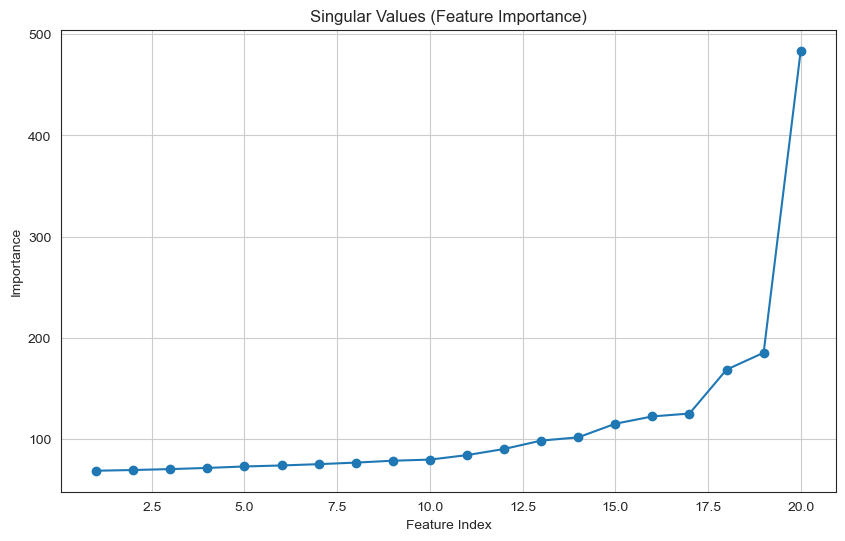


=== Latent Feature 0 ===
Top movies associated with this feature:
1. Silence of the Lambs, The (1991)
2. Godfather, The (1972)
3. M*A*S*H (1970)
4. Pulp Fiction (1994)
5. Monty Python's Life of Brian (1979)
6. Donnie Brasco (1997)
7. Ben-Hur (1959)
8. Grosse Pointe Blank (1997)
9. Princess Bride, The (1987)
10. Boot, Das (1981)

Based on these movies, this feature might represent:
(Look for common themes like genre, era, director, etc.)
------------------------------------------------------

=== Latent Feature 1 ===
Top movies associated with this feature:
1. Contact (1997)
2. Secrets & Lies (1996)
3. Rear Window (1954)
4. Star Trek IV: The Voyage Home (1986)
5. Mr. Holland's Opus (1995)
6. Psycho (1960)
7. Jurassic Park (1993)
8. Star Trek VI: The Undiscovered Country (1991)
9. Courage Under Fire (1996)
10. Duck Soup (1933)

Based on these movies, this feature might represent:
(Look for common themes like genre, era, director, etc.)
---------------------------------------------------

In [339]:
# Assuming movie_titles is your DataFrame with movie titles
interpret_movie_latent_features(u, s, vt, movie_titles)


In [335]:
interpret_latent_features_with_genres(vt, movie_titles, movie_genres, n_features=20, top_n=20)

NameError: name 'movie_genres' is not defined

In [337]:
interpret_latent_features(vt, movie_titles, n_features=20, top_n=10)